# Project 1 – Charles

In [135]:
import numpy as np
import pandas as pd
import re
import matplotlib
import seaborn as sns

In [136]:
aug_sep = pd.read_csv("Simmer_AugSep19.csv", low_memory=False)
oct_nov = pd.read_csv("Simmer_OctNov19.csv", low_memory=False)
dec_jan = pd.read_csv("Simmer_DecJan19.csv", low_memory=False)
feb_mar = pd.read_csv("Simmer_FebMar20.csv", low_memory=False)
people = pd.read_csv("People_Sample.csv", low_memory=False)

# Data Cleaning

Define a function that filters out columns that contains percentage of Nan values above a certain threshold.

In [137]:
def filter_nan(df, threshold):
    length = len(df)
    result = pd.DataFrame()
    for col in df.columns:
        if (df[col].isnull().sum() < length * threshold):
            result[col] = df[col]
    return result

In [138]:
filtered_aug_sep = filter_nan(aug_sep, 0.5)
filtered_oct_nov = filter_nan(oct_nov, 0.5)
filtered_dec_jan = filter_nan(dec_jan, 0.5)
filtered_feb_mar = filter_nan(feb_mar, 0.5)

In [139]:
useful_features_people = ['distinct_id', 
                   'properties.$ae_total_app_session_length', 
                   'properties.Name',
                   'properties.$region',
                   'properties.$country_code',
                   'properties.$city',
                   'properties.AuthProvider',
                   'properties.$ae_total_app_sessions',
                   'properties.$timezone',
                   'properties.$last_seen',
                   'properties.$ios_app_version',
                   'properties.$ios_version',
                   'properties.$ios_device_model',
                   'properties.$ios_lib_version',
                   'properties.$ae_first_app_open_date'
                  ]

In [140]:
def clean_people(people_data, features):
    people_data = filter_nan(people_data, 0.5)
    people_data = people_data.loc[:, features]
    people_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    people_data.rename(columns={'Name' : 'name', 'AuthProvider' : 'auth_provider'}, inplace=True)
    people_data['name'].fillna('Unknown', inplace=True)
    people_data['city'].fillna('Unknown', inplace=True)
    people_data['region'].fillna('Unknown', inplace=True)
    people_data['auth_provider'].fillna('Unknown', inplace=True)
    people_data['ae_first_app_open_date'] = pd.to_datetime(people_data['ae_first_app_open_date'])
    people_data['last_seen'] = pd.to_datetime(people_data['last_seen'])
    #add a column for time between first and last session
    people_data['active_timespan'] = people_data['last_seen'] - people_data['ae_first_app_open_date']
    people_data['average_session_time'] = people_data['ae_total_app_session_length']/people_data['ae_total_app_sessions']
    return people_data

In [141]:
people_cleaned = clean_people(people, useful_features_people)
people_cleaned

,distinct_id,ae_total_app_session_length,name,region,country_code,city,auth_provider,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,2.5.0,13.2.3,"iPhone9,3",3.4.9,NaT,NaT,196.544059
1,E2D9AB63-1718-4D1E-936F-10BE1D889989,4412,Theodore Wu,California,US,Burbank,Google,59,America/Los_Angeles,2019-09-08 03:15:47+00:00,2.0.5,13.1,"iPhone9,1",3.4.4,2019-04-22 20:34:46+00:00,138 days 06:41:01,74.779661
2,vaibhavverma9@gmail.com_56,71430,Vaibhav Verma,Gujarat,IN,Ahmedabad,Foodie,621,Asia/Kolkata,2019-04-15 15:18:25+00:00,1.3.7,12.2,"iPhone7,1",3.3.3,NaT,NaT,115.024155
3,0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,12836,Tiffany Qi,California,US,San Francisco,Facebook,77,America/Los_Angeles,2019-11-09 18:33:06+00:00,2.1.6,13.1.3,"iPhone9,3",3.4.4,2019-05-01 06:57:08+00:00,192 days 11:35:58,166.701299
4,addidas23@gmail.com_139,2066,Nathan Nangia,Illinois,US,Chicago,Foodie,39,America/Chicago,2020-03-18 15:09:21+00:00,2.5.4,13.4,"iPhone11,2",3.4.9,NaT,NaT,52.974359
5,582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8,11594,Alicia BurnsWright,District of Columbia,US,Washington,Facebook,127,America/New_York,2020-03-11 15:57:07+00:00,2.5.0,13.3.1,"iPhone10,1",3.4.9,2019-10-14 05:49:26+00:00,149 days 10:07:41,91.291339
6,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,2.5.0,12.4.1,"iPhone10,3",3.4.9,2019-07-11 22:20:45+00:00,237 days 01:52:08,91.037634
7,B3A9B684-A566-4DB7-B57F-0C8642031E23,2104,Vinodh Peddi,California,US,Santa Clara,Unknown,38,America/Los_Angeles,2020-03-11 20:43:22+00:00,2.5.0,13.3.1,"iPhone11,6",3.4.9,2019-04-23 21:00:16+00:00,322 days 23:43:06,55.368421
8,harshil1088@gmail.com_51,18358,Harshil Raval,Gujarat,IN,Ahmedabad,Google,123,Asia/Kolkata,2020-02-18 10:45:32+00:00,2.4.7,13.2.3,"iPhone9,3",3.4.4,NaT,NaT,149.252033
9,6D7E6967-8074-4EF4-B812-E456E91DADB5,3805,Will Bewley,California,US,San Francisco,Google,62,America/Los_Angeles,2020-03-11 19:23:24+00:00,2.5.0,13.3.1,"iPhone12,5",3.4.9,2018-12-18 13:11:46+00:00,449 days 06:11:38,61.370968


In [142]:
useful_features_event = ['name',
 'distinct_id',
 'time',
 'properties.$ae_session_length',
 'properties.$city',
 'properties.$region',
 'properties.mp_country_code',
 'properties.locationSetting',
 'properties.notificationSettings',
 'properties.FirstTimeUploaded',
 'properties.$had_persisted_distinct_id',
 'properties.Signup With',
 'properties.imageAdded',
 'properties.commentAdded',
 'properties.commentLength',
 'properties.ImageUploaded']

In [143]:
def clean_event(event_data, features):
    event_data = event_data.loc[:, features]
    event_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    return event_data

In [144]:
aug_sep_cleaned = clean_event(aug_sep, useful_features_event)
oct_nov_cleaned = clean_event(oct_nov, useful_features_event)
dec_jan_cleaned = clean_event(dec_jan, useful_features_event)
feb_mar_cleaned = clean_event(feb_mar, useful_features_event)
past_7_months = aug_sep_cleaned.append(oct_nov_cleaned).append(dec_jan_cleaned).append(feb_mar_cleaned)
past_7_months

,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,$ae_updated,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013412000,NaN,Columbus,Ohio,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,AppOpen,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013413000,NaN,Lake Zurich,Illinois,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,AppOpen,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145944000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,Visit Signup/Login Page,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145948000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,$ae_first_open,12C9B87A-53B0-4283-9083-40AE9F8AB95A,1565522925000,NaN,Niles,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,$ae_first_open,FF975FB1-4C9C-4A98-93A2-F95FF54BFFC1,1565624144000,NaN,Chicago,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,$ae_updated,0c43d566ee1c2744,1566465905000,NaN,Burbank,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
7,$ae_first_open,3BB43CA4-540F-4E0F-B6AE-E7FB731C3CC0,1566590595000,NaN,Santa Monica,California,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,$ae_first_open,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377942000,NaN,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
9,$ae_session,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377959000,16.5,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [145]:
merged = people_cleaned.merge(past_7_months, how='left', on='distinct_id')
merged

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
5,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
6,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
7,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
8,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
9,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


In [146]:
merged.isna().sum()

distinct_id                        0
ae_total_app_session_length        0
name_x                             0
region_x                           0
country_code                       0
city_x                             0
auth_provider                      0
ae_total_app_sessions              0
timezone                           0
last_seen                          0
ios_app_version                    0
ios_version                        0
ios_device_model                   0
ios_lib_version                    0
ae_first_app_open_date         45537
active_timespan                45537
average_session_time               0
name_y                            50
time                              50
ae_session_length              77785
city_y                          3951
region_y                        3482
mp_country_code                  101
locationSetting                92659
notificationSettings           92294
FirstTimeUploaded              85907
had_persisted_distinct_id        135
S

In [147]:
len(merged[merged['notificationSettings'].isna() == False].groupby('distinct_id').agg(sum))

35

In [148]:
len(merged.groupby('distinct_id').agg(sum))

181

In [149]:
merged['Signup With'] = merged['Signup With'].fillna(0)
merged

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
1,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
2,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
3,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
4,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
5,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
6,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
7,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
8,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN
9,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,0,NaN,NaN,NaN,NaN


In [150]:
su = merged[merged['Signup With'] != 0]
su

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
2681,582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8,11594,Alicia BurnsWright,District of Columbia,US,Washington,Facebook,127,America/New_York,2020-03-11 15:57:07+00:00,...,US,NaN,NaN,NaN,True,Facebook,NaN,NaN,NaN,NaN
3551,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
3806,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
5994,4749ABC7-01BD-4E5E-A957-D22EDDBCD76A,6541,Alex Knobel,District of Columbia,US,Washington,Unknown,44,America/New_York,2020-03-22 14:32:49+00:00,...,US,NaN,NaN,NaN,True,Google,NaN,NaN,NaN,NaN
6295,78D35D7D-A097-468F-AEF3-F93921366BD3,4672,Mansa Musa,California,US,San Francisco,Foodie,39,America/Los_Angeles,2020-02-26 01:02:08+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
6643,27968824-675F-4995-979B-44776827567C,4399,Pavan Bhargava,New York,US,New York,Facebook,58,America/New_York,2020-02-29 23:32:31+00:00,...,US,NaN,NaN,NaN,True,Facebook,NaN,NaN,NaN,NaN
25635,D3264EA1-91F5-4AB1-824C-39BC50BEA979,3903,Zack Zindler,California,US,Burbank,Foodie,45,America/Los_Angeles,2019-08-29 19:45:45+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
25636,D3264EA1-91F5-4AB1-824C-39BC50BEA979,3903,Zack Zindler,California,US,Burbank,Foodie,45,America/Los_Angeles,2019-08-29 19:45:45+00:00,...,US,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
26319,3059A451-3178-4602-84FF-AAD5E8607CAF,7934,Shivani Maheshwari,Gujarat,IN,Ahmedabad,Foodie,176,Asia/Kolkata,2019-11-30 11:38:12+00:00,...,IN,NaN,NaN,NaN,True,Foodie,NaN,NaN,NaN,NaN
27080,09353F2A-56B0-4BF8-B532-C8B9B25BCC80,5691,Kate Longo,District of Columbia,US,Washington,Unknown,66,America/New_York,2020-03-07 15:01:33+00:00,...,US,NaN,NaN,NaN,True,Facebook,NaN,NaN,NaN,NaN


In [151]:
su.groupby('distinct_id').agg(sum)

,ae_total_app_session_length,ae_total_app_sessions,average_session_time,time,commentLength
distinct_id,,,,,
09353F2A-56B0-4BF8-B532-C8B9B25BCC80,5691,66,86.227273,1.576474e+12,0.0
0A9EAE40-440D-4292-91CE-1817EC1C5E82,3040,62,49.032258,1.577351e+12,0.0
14AF7B99-6CB0-42BC-8FD7-4D7172595D4F,6362,67,94.955224,1.571337e+12,0.0
14E548F9-6049-43B4-91FC-447A6F3918B7,8956,91,98.417582,1.571748e+12,0.0
27968824-675F-4995-979B-44776827567C,4399,58,75.844828,1.565728e+12,0.0
2BA8DF6C-7C91-4299-A397-64CA7548B26F,2604,44,59.181818,1.567780e+12,0.0
2ED8AA78-8015-4812-AB34-CCA9909AC090,3328,41,81.170732,1.570885e+12,0.0
3059A451-3178-4602-84FF-AAD5E8607CAF,7934,176,45.079545,1.572997e+12,0.0
35E2002C-4527-4BE0-A29F-37C2C66AF4EA,2078,34,61.117647,1.568862e+12,0.0


In [152]:
merged.columns

Index(['distinct_id', 'ae_total_app_session_length', 'name_x', 'region_x',
       'country_code', 'city_x', 'auth_provider', 'ae_total_app_sessions',
       'timezone', 'last_seen', 'ios_app_version', 'ios_version',
       'ios_device_model', 'ios_lib_version', 'ae_first_app_open_date',
       'active_timespan', 'average_session_time', 'name_y', 'time',
       'ae_session_length', 'city_y', 'region_y', 'mp_country_code',
       'locationSetting', 'notificationSettings', 'FirstTimeUploaded',
       'had_persisted_distinct_id', 'Signup With', 'imageAdded',
       'commentAdded', 'commentLength', 'ImageUploaded'],
      dtype='object')

In [153]:
merged.groupby('distinct_id').agg({'name_x' : min})

,name_x
distinct_id,
04092BFB-F874-4B4A-A970-CE8E328B2DF7,Richard wu
04ADA4C3-9212-49DA-B600-67A8403D69C3,Alexandria Ma
054528AB-F5A3-4C47-A572-A32F9D57C9D1,Emily Alvarado
06734B33-C7EE-4CA7-9643-7C27BB6B509F,Angela Zhao
09353F2A-56B0-4BF8-B532-C8B9B25BCC80,Kate Longo
0A9EAE40-440D-4292-91CE-1817EC1C5E82,Wanmin Zhang
0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,Tiffany Qi
0EA7FB2F-E86D-4DD6-BAA1-1DF7F21C358F,Unknown
0F949AE7-2983-47AC-B81C-946ED693F153,Ken Rozin


# Exploratory Data Analysis

# Visualization

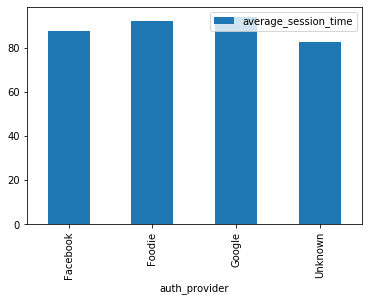

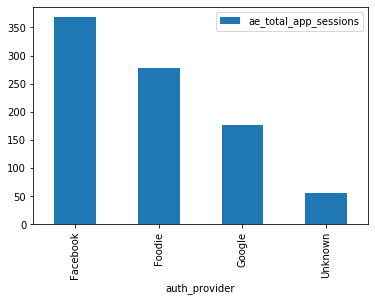

In [154]:
session_length = people_cleaned[['auth_provider', 'average_session_time']].groupby('auth_provider').mean()
num_sessions = people_cleaned[['auth_provider', 'ae_total_app_sessions']].groupby('auth_provider').mean()
session_length.plot.bar()
num_sessions.plot.bar();


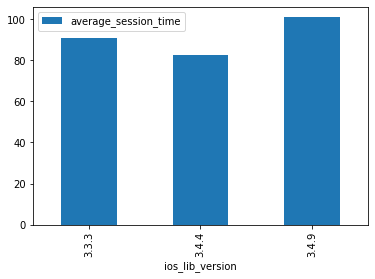

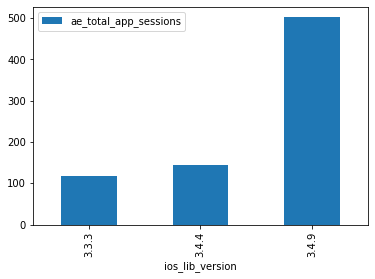

In [155]:
session_length1 = people_cleaned[['ios_lib_version', 'average_session_time']].groupby('ios_lib_version').mean()
num_sessions1 = people_cleaned[['ios_lib_version', 'ae_total_app_sessions']].groupby('ios_lib_version').mean()
session_length1.plot.bar()
num_sessions1.plot.bar();

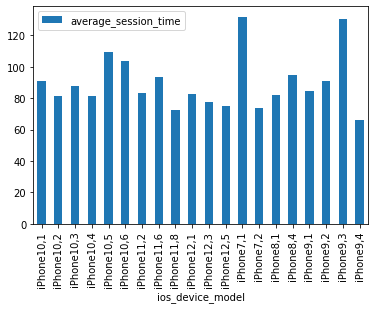

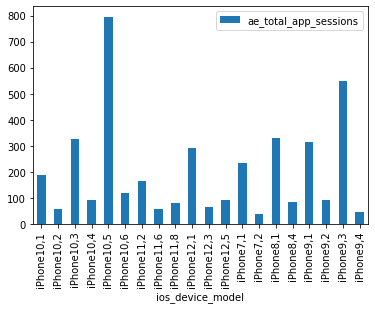

In [156]:
session_length2 = people_cleaned[['ios_device_model', 'average_session_time']].groupby('ios_device_model').mean()
num_sessions2 = people_cleaned[['ios_device_model', 'ae_total_app_sessions']].groupby('ios_device_model').mean()
session_length2.plot.bar()
num_sessions2.plot.bar();

In [157]:
people_cleaned.groupby('distinct_id').agg(sum)

,ae_total_app_session_length,ae_total_app_sessions,average_session_time
distinct_id,,,
04092BFB-F874-4B4A-A970-CE8E328B2DF7,1845,32,57.656250
04ADA4C3-9212-49DA-B600-67A8403D69C3,2283,45,50.733333
054528AB-F5A3-4C47-A572-A32F9D57C9D1,7895,41,192.560976
06734B33-C7EE-4CA7-9643-7C27BB6B509F,2967,45,65.933333
09353F2A-56B0-4BF8-B532-C8B9B25BCC80,5691,66,86.227273
0A9EAE40-440D-4292-91CE-1817EC1C5E82,3040,62,49.032258
0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,12836,77,166.701299
0EA7FB2F-E86D-4DD6-BAA1-1DF7F21C358F,4718,44,107.227273
0F949AE7-2983-47AC-B81C-946ED693F153,8702,137,63.518248


In [158]:
people_cleaned.columns

Index(['distinct_id', 'ae_total_app_session_length', 'name', 'region',
       'country_code', 'city', 'auth_provider', 'ae_total_app_sessions',
       'timezone', 'last_seen', 'ios_app_version', 'ios_version',
       'ios_device_model', 'ios_lib_version', 'ae_first_app_open_date',
       'active_timespan', 'average_session_time'],
      dtype='object')

In [159]:
type(people_cleaned['ae_total_app_session_length'][0])

numpy.int64

In [160]:
people_cleaned.groupby('auth_provider').agg('count')

,distinct_id,ae_total_app_session_length,name,region,country_code,city,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time
auth_provider,,,,,,,,,,,,,,,,
Facebook,40,40,40,40,40,40,40,40,40,40,40,40,40,27,27,40
Foodie,74,74,74,74,74,74,74,74,74,74,74,74,74,52,52,74
Google,24,24,24,24,24,24,24,24,24,24,24,24,24,17,17,24
Unknown,43,43,43,43,43,43,43,43,43,43,43,43,43,37,37,43


In [161]:
def count_unknown(df, keyword):
    countDict = {}
    for col in df.columns:
        new = df[df[col] == keyword].drop_duplicates('distinct_id')
        count = len(new)
        countDict.update({col : count})
    return countDict

In [162]:
count_unknown(people_cleaned, 'Unknown')

{'distinct_id': 0,
 'ae_total_app_session_length': 0,
 'name': 23,
 'region': 6,
 'country_code': 0,
 'city': 7,
 'auth_provider': 43,
 'ae_total_app_sessions': 0,
 'timezone': 0,
 'last_seen': 0,
 'ios_app_version': 0,
 'ios_version': 0,
 'ios_device_model': 0,
 'ios_lib_version': 0,
 'ae_first_app_open_date': 0,
 'active_timespan': 0,
 'average_session_time': 0}

In [163]:
def column_type(df):
    typeDict = {}
    for col in df.columns:
        typeCol = type(df[col][1])
        typeDict.update({col : typeCol})
    return typeDict

In [164]:
column_type(people_cleaned)

{'distinct_id': str,
 'ae_total_app_session_length': numpy.int64,
 'name': str,
 'region': str,
 'country_code': str,
 'city': str,
 'auth_provider': str,
 'ae_total_app_sessions': numpy.int64,
 'timezone': str,
 'last_seen': pandas._libs.tslibs.timestamps.Timestamp,
 'ios_app_version': str,
 'ios_version': str,
 'ios_device_model': str,
 'ios_lib_version': str,
 'ae_first_app_open_date': pandas._libs.tslibs.timestamps.Timestamp,
 'active_timespan': pandas._libs.tslibs.timedeltas.Timedelta,
 'average_session_time': numpy.float64}

In [165]:
people_cleaned

,distinct_id,ae_total_app_session_length,name,region,country_code,city,auth_provider,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,2.5.0,13.2.3,"iPhone9,3",3.4.9,NaT,NaT,196.544059
1,E2D9AB63-1718-4D1E-936F-10BE1D889989,4412,Theodore Wu,California,US,Burbank,Google,59,America/Los_Angeles,2019-09-08 03:15:47+00:00,2.0.5,13.1,"iPhone9,1",3.4.4,2019-04-22 20:34:46+00:00,138 days 06:41:01,74.779661
2,vaibhavverma9@gmail.com_56,71430,Vaibhav Verma,Gujarat,IN,Ahmedabad,Foodie,621,Asia/Kolkata,2019-04-15 15:18:25+00:00,1.3.7,12.2,"iPhone7,1",3.3.3,NaT,NaT,115.024155
3,0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,12836,Tiffany Qi,California,US,San Francisco,Facebook,77,America/Los_Angeles,2019-11-09 18:33:06+00:00,2.1.6,13.1.3,"iPhone9,3",3.4.4,2019-05-01 06:57:08+00:00,192 days 11:35:58,166.701299
4,addidas23@gmail.com_139,2066,Nathan Nangia,Illinois,US,Chicago,Foodie,39,America/Chicago,2020-03-18 15:09:21+00:00,2.5.4,13.4,"iPhone11,2",3.4.9,NaT,NaT,52.974359
5,582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8,11594,Alicia BurnsWright,District of Columbia,US,Washington,Facebook,127,America/New_York,2020-03-11 15:57:07+00:00,2.5.0,13.3.1,"iPhone10,1",3.4.9,2019-10-14 05:49:26+00:00,149 days 10:07:41,91.291339
6,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,2.5.0,12.4.1,"iPhone10,3",3.4.9,2019-07-11 22:20:45+00:00,237 days 01:52:08,91.037634
7,B3A9B684-A566-4DB7-B57F-0C8642031E23,2104,Vinodh Peddi,California,US,Santa Clara,Unknown,38,America/Los_Angeles,2020-03-11 20:43:22+00:00,2.5.0,13.3.1,"iPhone11,6",3.4.9,2019-04-23 21:00:16+00:00,322 days 23:43:06,55.368421
8,harshil1088@gmail.com_51,18358,Harshil Raval,Gujarat,IN,Ahmedabad,Google,123,Asia/Kolkata,2020-02-18 10:45:32+00:00,2.4.7,13.2.3,"iPhone9,3",3.4.4,NaT,NaT,149.252033
9,6D7E6967-8074-4EF4-B812-E456E91DADB5,3805,Will Bewley,California,US,San Francisco,Google,62,America/Los_Angeles,2020-03-11 19:23:24+00:00,2.5.0,13.3.1,"iPhone12,5",3.4.9,2018-12-18 13:11:46+00:00,449 days 06:11:38,61.370968


In [166]:
total

,dataset,distinct_id,name,properties.$app_build_number,properties.$app_release,properties.$app_version,properties.$app_version_string,properties.$carrier,properties.$city,properties.$device_id,...,properties.$screen_width,properties.$user_id,properties.$wifi,properties.UUId,properties.mp_country_code,properties.mp_device_model,properties.mp_lib,properties.mp_processing_time_ms,sampling_factor,time
0,$mixpanel,4A47A27E-992F-40D8-8A7E-08CA601D441A,$ae_updated,1.9.1,1.9.1,1.9.1,1.9.1,Verizon,Columbus,B91FF995-AB61-4F23-9BF0-085FB9059A0A,...,414.0,4A47A27E-992F-40D8-8A7E-08CA601D441A,True,4A47A27E-992F-40D8-8A7E-08CA601D441A,US,"iPhone11,8",iphone,1565038612532,1,1565013412000
1,$mixpanel,4A47A27E-992F-40D8-8A7E-08CA601D441A,AppOpen,1.9.1,1.9.1,1.9.1,1.9.1,Verizon,Lake Zurich,B91FF995-AB61-4F23-9BF0-085FB9059A0A,...,414.0,4A47A27E-992F-40D8-8A7E-08CA601D441A,True,4A47A27E-992F-40D8-8A7E-08CA601D441A,US,"iPhone11,8",iphone,1565057719455,1,1565013413000
2,$mixpanel,866F0631-15CB-40CD-8E0A-04753AFFB01A,AppOpen,1.9.2,1.9.2,1.9.2,1.9.2,Vodafone India,Ahmedabad,6A561D0E-20A9-4E09-9C10-F4E0AAF20A59,...,375.0,866F0631-15CB-40CD-8E0A-04753AFFB01A,True,866F0631-15CB-40CD-8E0A-04753AFFB01A,IN,"iPhone9,3",iphone,1565171204822,1,1565145944000
3,$mixpanel,866F0631-15CB-40CD-8E0A-04753AFFB01A,Visit Signup/Login Page,1.9.2,1.9.2,1.9.2,1.9.2,Vodafone India,Ahmedabad,6A561D0E-20A9-4E09-9C10-F4E0AAF20A59,...,375.0,866F0631-15CB-40CD-8E0A-04753AFFB01A,True,866F0631-15CB-40CD-8E0A-04753AFFB01A,IN,"iPhone9,3",iphone,1565171204788,1,1565145948000
4,$mixpanel,12C9B87A-53B0-4283-9083-40AE9F8AB95A,$ae_first_open,1.9.3,1.9.3,1.9.3,1.9.3,Verizon,Niles,NaN,...,375.0,NaN,NaN,NaN,US,"iPhone11,2",iphone,1565548239650,1,1565522925000
5,$mixpanel,FF975FB1-4C9C-4A98-93A2-F95FF54BFFC1,$ae_first_open,1.9.4,1.9.4,1.9.4,1.9.4,Sprint,Chicago,NaN,...,414.0,NaN,NaN,NaN,US,"iPhone11,8",iphone,1565649359577,1,1565624144000
6,$mixpanel,0c43d566ee1c2744,$ae_updated,101101,101101,1.8.7,1.8.7,Sprint,Burbank,NaN,...,1080.0,NaN,False,0c43d566ee1c2744,US,NaN,android,1566491114730,1,1566465905000
7,$mixpanel,3BB43CA4-540F-4E0F-B6AE-E7FB731C3CC0,$ae_first_open,1.9.6,1.9.6,1.9.6,1.9.6,Verizon,Santa Monica,NaN,...,375.0,NaN,True,NaN,US,"iPhone10,3",iphone,1566615846888,1,1566590595000
8,$mixpanel,d7b04a61-5d27-4144-bcfc-bf16c479606f,$ae_first_open,101105,101105,2.0.5,2.0.5,T-Mobile,Redwood City,d7b04a61-5d27-4144-bcfc-bf16c479606f,...,1080.0,NaN,True,NaN,US,NaN,android,1567403159637,1,1567377942000
9,$mixpanel,d7b04a61-5d27-4144-bcfc-bf16c479606f,$ae_session,101105,101105,2.0.5,2.0.5,T-Mobile,Redwood City,d7b04a61-5d27-4144-bcfc-bf16c479606f,...,1080.0,NaN,True,NaN,US,NaN,android,1567403159636,1,1567377959000


In [168]:
past_7_months

,name,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,$ae_updated,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013412000,NaN,Columbus,Ohio,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,AppOpen,4A47A27E-992F-40D8-8A7E-08CA601D441A,1565013413000,NaN,Lake Zurich,Illinois,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,AppOpen,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145944000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,Visit Signup/Login Page,866F0631-15CB-40CD-8E0A-04753AFFB01A,1565145948000,NaN,Ahmedabad,Gujarat,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,$ae_first_open,12C9B87A-53B0-4283-9083-40AE9F8AB95A,1565522925000,NaN,Niles,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,$ae_first_open,FF975FB1-4C9C-4A98-93A2-F95FF54BFFC1,1565624144000,NaN,Chicago,Illinois,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,$ae_updated,0c43d566ee1c2744,1566465905000,NaN,Burbank,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
7,$ae_first_open,3BB43CA4-540F-4E0F-B6AE-E7FB731C3CC0,1566590595000,NaN,Santa Monica,California,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,$ae_first_open,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377942000,NaN,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
9,$ae_session,d7b04a61-5d27-4144-bcfc-bf16c479606f,1567377959000,16.5,Redwood City,California,US,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
